varying decode length, prefill: 64

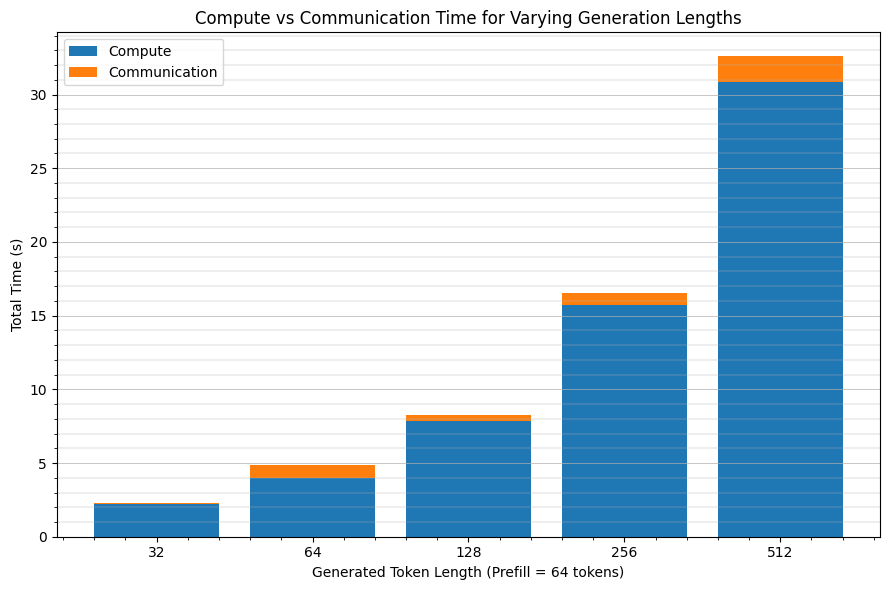

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# === Define all CSV paths: (device1, device2) for each decode length ===
paths = {
    32: (
        "/media/ssd/AgentMesh/logs/gpt2/varyingDecode/32/device1.csv",
        "/media/ssd/AgentMesh/logs/gpt2/varyingDecode/32/device2.csv"
    ),
    64: (
        "/media/ssd/AgentMesh/logs/gpt2/varyingDecode/64/device1.csv",
        "/media/ssd/AgentMesh/logs/gpt2/varyingDecode/64/device2.csv"
    ),
    128: (
        "/media/ssd/AgentMesh/logs/gpt2/varyingDecode/128/device1.csv",
        "/media/ssd/AgentMesh/logs/gpt2/varyingDecode/128/device2.csv"
    ),
    256: (
        "/media/ssd/AgentMesh/logs/gpt2/varyingDecode/256/device1.csv",
        "/media/ssd/AgentMesh/logs/gpt2/varyingDecode/256/device2.csv"
    ),
    512: (
        "/media/ssd/AgentMesh/logs/gpt2/varyingDecode/512/device1.csv",
        "/media/ssd/AgentMesh/logs/gpt2/varyingDecode/512/device2.csv"
    )
}

# === Storage for bar values ===
decode_lengths = []
compute_times = []
comm_times = []

# === Load and process each decode length ===
for decode_len, (csv1, csv2) in paths.items():
    df1 = pd.read_csv(csv1)
    df2 = pd.read_csv(csv2)
    df = pd.concat([df1, df2], ignore_index=True)
    
    summary = df.groupby("Type")["Time"].sum()
    compute_time = summary.get("Compute", 0)
    comm_time = summary.get("Communication", 0)

    decode_lengths.append(str(decode_len))
    compute_times.append(compute_time)
    comm_times.append(comm_time)

# === Plotting ===
fig, ax = plt.subplots(figsize=(9, 6))
ax.bar(decode_lengths, compute_times, label="Compute")
ax.bar(decode_lengths, comm_times, bottom=compute_times, label="Communication")

ax.set_ylabel("Total Time (s)")
ax.set_xlabel("Generated Token Length (Prefill = 64 tokens)")
ax.set_title("Compute vs Communication Time for Varying Generation Lengths")
ax.legend()

ax.yaxis.grid(True, which='minor', linestyle='solid', linewidth=0.3)
ax.yaxis.grid(True, which='major', linestyle='solid', linewidth=0.5)
ax.minorticks_on()
plt.tight_layout()
plt.show()
